<a href="https://www.kaggle.com/code/jasminemohamed2545/bank-customer-rfm-analysis?scriptVersionId=258813258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the specified file path with proper encoding for special characters
data = pd.read_csv("/kaggle/input/bank-customer-segmentation/bank_transactions.csv", encoding = 'ISO-8859-1')

data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
# Display the dimensions (rows, columns) of the DataFrame
data.shape

(1048567, 9)

In [4]:
# Display information about the DataFrame, such as column types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
data['CustomerID'] = data['CustomerID'].astype(str)

data['CustomerID'] = data['CustomerID'].str.replace('C', '')

data['CustomerID'] = pd.to_numeric(data['CustomerID'])

data.dropna(subset=['CustomerID'], inplace=True)

data['CustomerID'] = data['CustomerID'].astype('int64')

print(data.head())
print(data.info())

  TransactionID  CustomerID CustomerDOB CustGender CustLocation  \
0            T1     5841053     10/1/94          F   JAMSHEDPUR   
1            T2     2142763      4/4/57          M      JHAJJAR   
2            T3     4417068    26/11/96          F       MUMBAI   
3            T4     5342380     14/9/73          F       MUMBAI   
4            T5     9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 10

In [6]:
# Provide a statistical summary of numerical columns
# Provide a statistical summary of numerical columns without scientific notation
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,CustomerID,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1048567.00,1046198.00,1048567.00,1048567.00
mean,5036317.95,115403.54,157087.53,1574.34
std,2339312.06,846485.38,51261.85,6574.74
min,1010011.00,0.00,0.00,0.00
25%,3020653.50,4721.76,124030.00,161.00
50%,5030787.00,16792.18,164226.00,459.03
75%,7041737.00,57657.36,200010.00,1200.00
max,9099956.00,115035495.10,235959.00,1560034.99


In [7]:
# Filter out rows where 'Quantity' is less than or equal to zero
data = data[data["TransactionAmount (INR)"] > 0]

In [8]:
# Check if there are any duplicate rows in the DataFrame
data.duplicated().any()

False

In [9]:
# Remove duplicate rows from the DataFrame
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(1047732, 9)

In [11]:
# Print the number of unique values in each column of the DataFrame
print(data.nunique())

TransactionID              1047732
CustomerID                  883660
CustomerDOB                  17252
CustGender                       3
CustLocation                  9351
CustAccountBalance          161279
TransactionDate                 55
TransactionTime              81860
TransactionAmount (INR)      93023
dtype: int64


In [12]:
# Create a new DataFrame by selecting only the 'Country' and 'CustomerID' columns, dropping duplicate entries
filtered_data = data[["CustLocation","CustomerID"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape

  CustLocation  CustomerID
0   JAMSHEDPUR     5841053
1      JHAJJAR     2142763
2       MUMBAI     4417068
3       MUMBAI     5342380
4  NAVI MUMBAI     9031234


(1039672, 2)

<Axes: xlabel='CustLocation'>

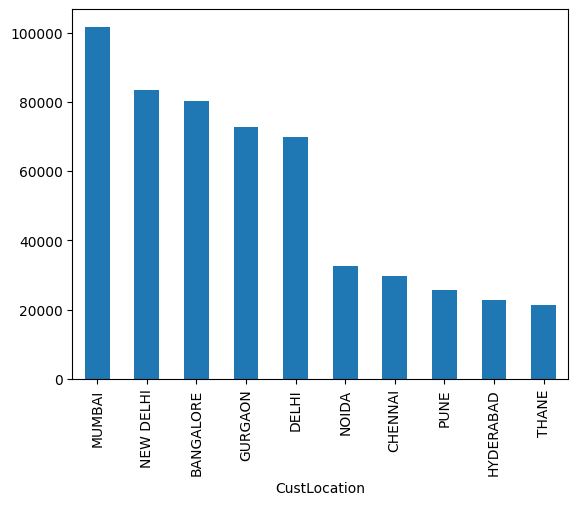

In [13]:
#Top ten country's customer
filtered_data.CustLocation.value_counts()[:10].plot(kind='bar')

In [14]:
# Filter the dataset to include only transactions made in MUMBAI
MUMBAI_data = data[data["CustLocation"] == "MUMBAI"]
MUMBAI_data = data[data["CustLocation"] == "MUMBAI"]
#MUMBAI_data['TransactionDate'] = MUMBAI_data['TransactionDate'].str.strip()# to Ensure all values are clean after i converted them to datetime type in the excel sheet


In [15]:
print(MUMBAI_data.nunique())
print(MUMBAI_data.dtypes) # to check the data type of each column specially the datetime ones as ana la3abt feh ktiir awii lanoh awl ma gah kan 7ba string we 7ba date time we 3amlt kolo shoghl excel we et7wel fe3lan bas kan feh moshkla en el 7roof mesh clean fa nadatataha be el satr eli ta7t dah 

TransactionID              103512
CustomerID                 101650
CustomerDOB                  7916
CustGender                      2
CustLocation                    1
CustAccountBalance          15700
TransactionDate                54
TransactionTime             50794
TransactionAmount (INR)     18875
dtype: int64
TransactionID               object
CustomerID                   int64
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


In [16]:
# Select relevant columns AND create an explicit copy
MUMBAI_data = MUMBAI_data[["CustomerID","TransactionID","TransactionDate","TransactionAmount (INR)","CustAccountBalance"]].copy()

# Now, all subsequent operations are safely performed on this new DataFrame
# Create a new column 'TotalAccountBalance'
MUMBAI_data["TotalAccountBalance"] = MUMBAI_data["TransactionAmount (INR)"] + MUMBAI_data["CustAccountBalance"]

# Convert 'TransactionDate' column to datetime objects
MUMBAI_data['TransactionDate'] = pd.to_datetime(MUMBAI_data['TransactionDate'], errors='coerce')

MUMBAI_data.head()

/tmp/ipykernel_13/768514377.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MUMBAI_data['TransactionDate'] = pd.to_datetime(MUMBAI_data['TransactionDate'], errors='coerce')


,CustomerID,TransactionID,TransactionDate,TransactionAmount (INR),CustAccountBalance,TotalAccountBalance
2,4417068,T3,2016-02-08,459.00,17874.44,18333.44
3,5342380,T4,2016-02-08,2060.00,866503.21,868563.21
6,7126560,T7,2016-02-08,566.00,973.46,1539.46
7,1220223,T8,2016-02-08,148.00,95075.54,95223.54
9,6638934,T10,2016-02-08,289.11,4279.22,4568.33


In [17]:
#Getting the time at the moment
present_time = datetime.now()
present_time

datetime.datetime(2025, 8, 29, 5, 21, 6, 561354)

In [18]:
rfm = MUMBAI_data.groupby("CustomerID").agg({"TransactionDate":lambda date : (present_time - date.max()).days,
                                  "TransactionID": lambda num : len(num),
                                  "TotalAccountBalance" : lambda price : price.sum()})
rfm.head()

,TransactionDate,TransactionID,TotalAccountBalance
CustomerID,,,
1010012,3302,1,25703.49
1010014,3339,2,201680.90
1010035,3521,1,7334.42
1010060,3289,1,44086.76
1010078,3521,1,1421873.86


In [19]:
#Re-naming the columns of the rfm dataframe
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101650 entries, 1010012 to 9099180
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Recency    101650 non-null  int64  
 1   Frequency  101650 non-null  int64  
 2   Monetary   101650 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


In [20]:
print(rfm['Frequency'].nunique())
print(rfm['Monetary'].nunique())

3
87325


In [21]:
# Create quartiles for Frequency by first ranking the data
# method='first' ensures that ties are ranked in the order they appear
rfm['f_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=['4', '3', '2', '1'])

# The rest of your code
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, labels=['1', '2', '3', '4'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, labels=['4', '3', '2', '1'])


# Display the head of the DataFrame
rfm.head()

,Recency,Frequency,Monetary,f_quartile,r_quartile,m_quartile
CustomerID,,,,,,
1010012,3302,1,25703.49,4,3,3
1010014,3339,2,201680.90,1,3,1
1010035,3521,1,7334.42,4,4,4
1010060,3289,1,44086.76,4,2,2
1010078,3521,1,1421873.86,4,4,1


In [22]:
# Combine the quartile rankings into a single RFM score (Recency, Frequency, Monetary)
rfm["RFM_Score"] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,f_quartile,r_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
1010012,3302,1,25703.49,4,3,3,343
1010014,3339,2,201680.90,1,3,1,311
1010035,3521,1,7334.42,4,4,4,444
1010060,3289,1,44086.76,4,2,2,242
1010078,3521,1,1421873.86,4,4,1,441


In [23]:
# Filter customers who have the best RFM score (111) and display the top spenders in descending order of 'Monetary'
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary',ascending=False).head()

,Recency,Frequency,Monetary,f_quartile,r_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
8441932,3215,1,21575823.28,1,1,1,111
7626569,3271,1,15544440.36,1,1,1,111
7611181,3276,1,15160474.07,1,1,1,111
8911171,3271,1,15160474.07,1,1,1,111
8938233,3186,1,13018165.89,1,1,1,111


In [24]:
# Create RFM segments based on the RFM score
rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.head()

,Recency,Frequency,Monetary,f_quartile,r_quartile,m_quartile,RFM_Score,Value_Segment
CustomerID,,,,,,,,
1010012,3302,1,25703.49,4,3,3,343,Low-Value
1010014,3339,2,201680.90,1,3,1,311,Mid-Value
1010035,3521,1,7334.42,4,4,4,444,Low-Value
1010060,3289,1,44086.76,4,2,2,242,Mid-Value
1010078,3521,1,1421873.86,4,4,1,441,Low-Value


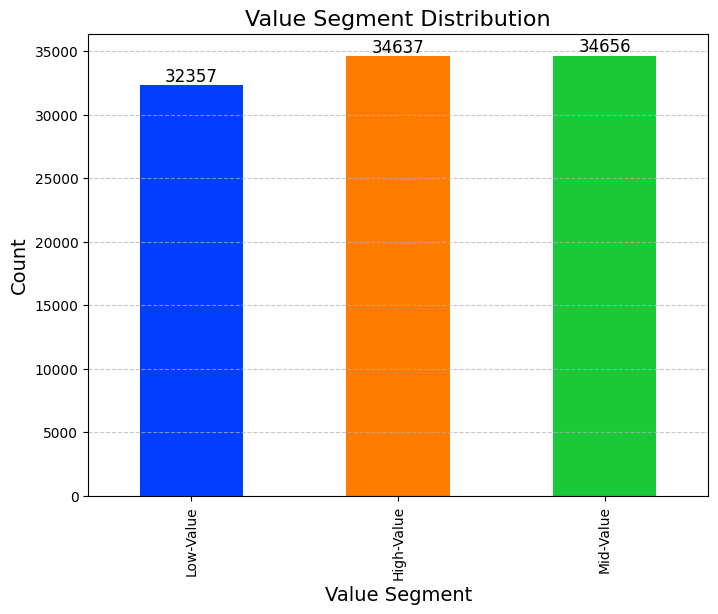

In [25]:
# Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette('bright', 3))  # Create a bar plot with the 'Value_Segment' column

# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16)  # Add a title with font size
ax.set_xlabel('Value Segment', fontsize=14)              # Add x-label with font size
ax.set_ylabel('Count', fontsize=14)                       # Add y-label with font size
ax.grid(axis='y', linestyle='--', alpha=0.7)             # Add gridlines for better readability

# Show value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

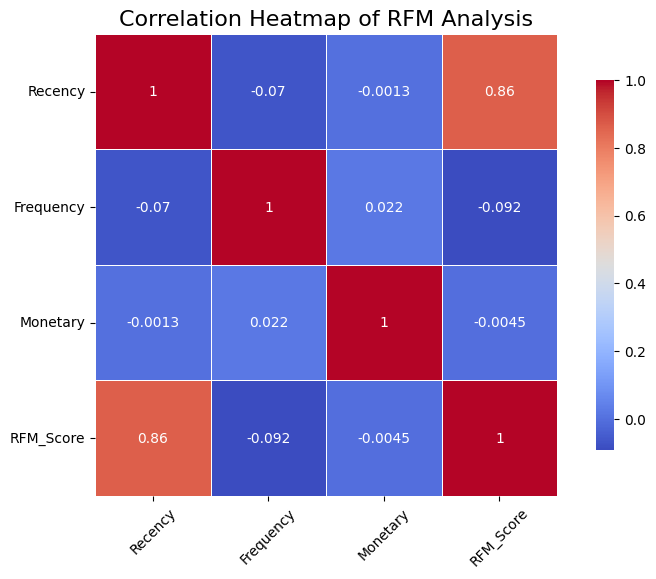

In [26]:
# Select relevant columns for correlation
columns_to_plot = ['Recency', 'Frequency', 'Monetary', 'RFM_Score']
correlation_matrix = rfm[columns_to_plot].corr()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',  # Color map
            square=True,  # Make cells square-shaped
            linewidths=0.5,  # Width of the lines separating cells
            cbar_kws={"shrink": .8},
            annot=True)  # Show correlation coefficients

# Add title and labels
plt.title('Correlation Heatmap of RFM Analysis', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.show()

The strong positive correlation between Recency and RFM_Score suggests that recent customers tend to have higher RFM scores. 

In [27]:
# Convert quartile columns to numeric type to calculate the mean
rfm['r_quartile'] = rfm['r_quartile'].astype(int)
rfm['f_quartile'] = rfm['f_quartile'].astype(int)
rfm['m_quartile'] = rfm['m_quartile'].astype(int)

# Calculate the average RFM SCORES (1-4) for each segment
segment_scores = rfm.groupby('Value_Segment')[['r_quartile', 'f_quartile', 'm_quartile']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score (using the new r_quartile column)
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['r_quartile'],
    name='Recency Score',
    marker_color='rgb(158,102,225)'
))

# Add bars for Frequency score (using the new f_quartile column)
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['f_quartile'],
    name='Frequency Score',
    marker_color='rgb(102,158,217)'
))

# Add bars for Monetary score (using the new m_quartile column)
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['m_quartile'],
    name='Monetary Score',
    marker_color='rgb(50,102,148)'
))

# Update the layout (No changes here, it's already good)
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores (1-4)',
    xaxis_title='RFM Segments',
    yaxis_title='Average Score (1-4)',
    barmode='group',
    showlegend=True,
    width=1000,
    height=600
)
# Show the plot
fig.show()

/tmp/ipykernel_13/3546283979.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_scores = rfm.groupby('Value_Segment')[['r_quartile', 'f_quartile', 'm_quartile']].mean().reset_index()


High-Value customers are characterized by high recent purchases, frequent buying behavior, and significant spending, making them essential for the business.

Mid-Value customers have moderate engagement but could be potential targets for strategies to convert them into High-Value customers.

Low-Value customers show signs of disengagement, making them a focus for re-engagement strategies to boost their purchasing behavior.